In [327]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import adfuller

# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import statsmodels.tools.eval_measures as em
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [250]:
df = pd.read_csv("Sparkling.csv")

In [251]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [252]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [253]:
df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [254]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [256]:
round(df.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


In [257]:
df.shape

(187, 2)

In [258]:
df = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [259]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [260]:
df.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


# Exploratory Data Analysis

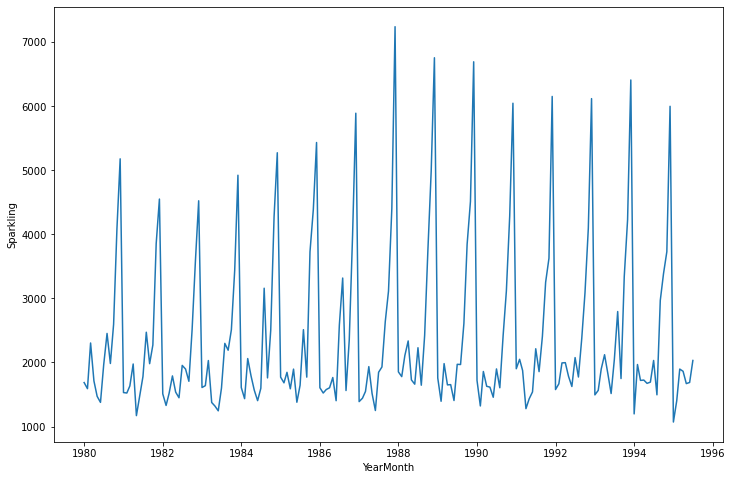

In [261]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index, y='Sparkling')  
plt.show()

In [262]:
#We will resample the data to get values at a month-level from the day-level data by taking the average over the months.

df = df.resample('M').mean()
df.head()

,Sparkling
YearMonth,
1980-01-31,1686.0
1980-02-29,1591.0
1980-03-31,2304.0
1980-04-30,1712.0
1980-05-31,1471.0


In [263]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


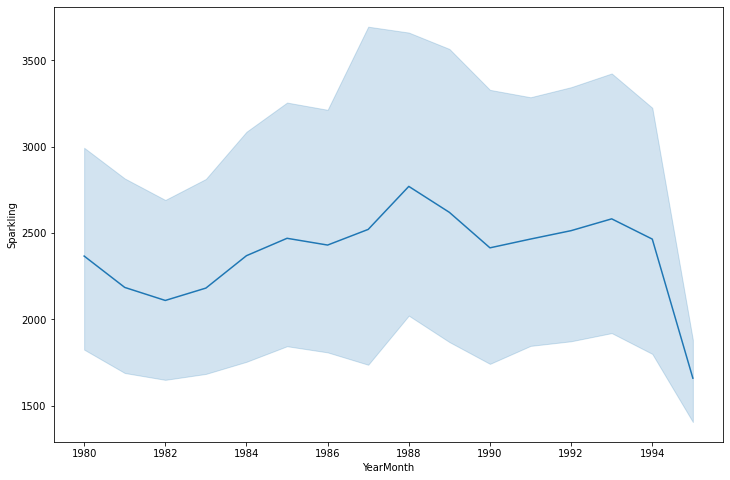

In [264]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index.year, y='Sparkling') 
plt.show()

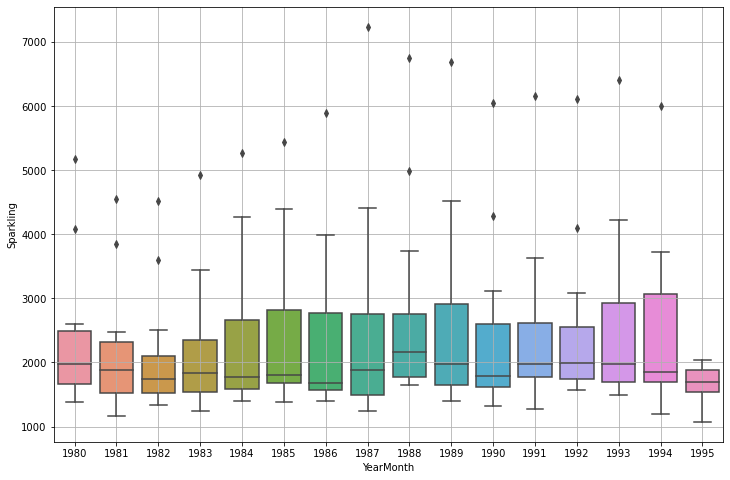

In [265]:
plt.figure(figsize=(12, 8))

# Plot a boxplot at year level
sns.boxplot(x=df.index.year, y='Sparkling', data=df) 
plt.grid()
plt.show()

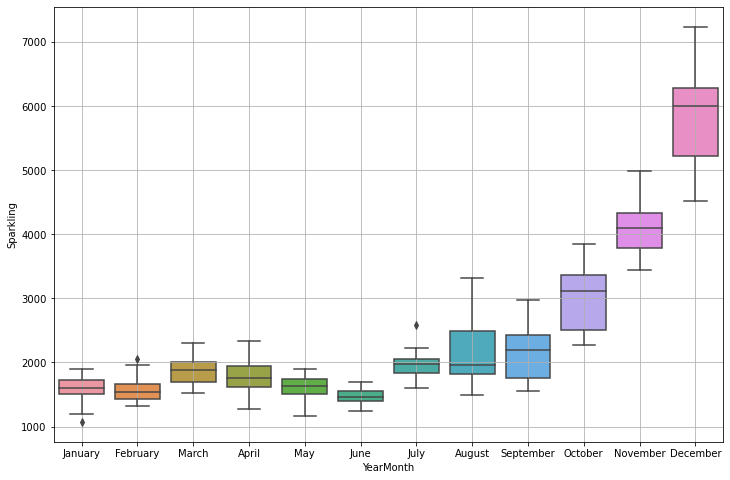

In [266]:
plt.figure(figsize=(12, 8))

# Plot a boxplot at month level
sns.boxplot(x=df.index.month_name(), y='Sparkling', data=df) 
plt.grid()
plt.show()

In [267]:
monthly_price_across_years = pd.pivot_table(df, values='Sparkling', columns=df.index.month_name(), index=df.index.year)
monthly_price_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


<Figure size 1080x576 with 0 Axes>

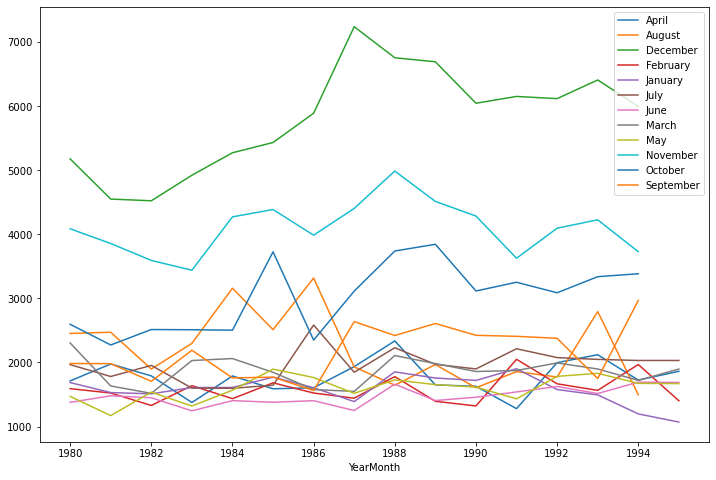

In [268]:
plt.figure(figsize=(15, 8))

# the code to plot the trend of months across years
monthly_price_across_years.plot()

plt.legend(loc='best')
plt.show()

# Decomposition

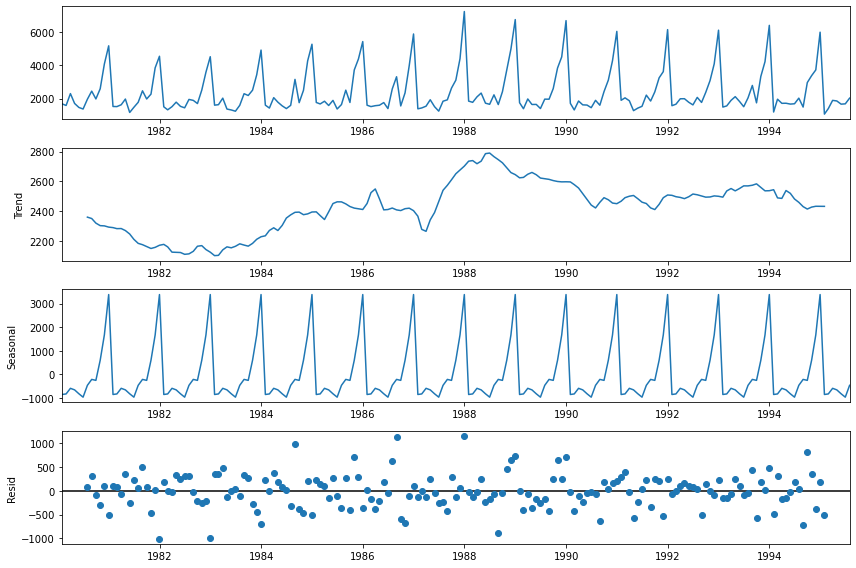

In [269]:
#Decompose the time series additively
df_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)

df_add_decompose.plot()
plt.show()

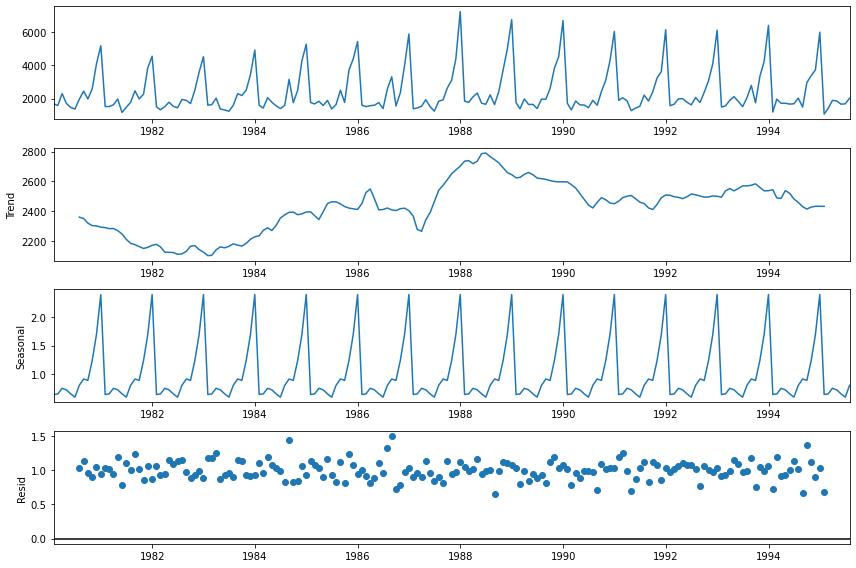

In [270]:
##Decompose the time series multiplicatively
df_mul_decompose = seasonal_decompose(df, model = "multiplicative")
df_mul_decompose.plot()
plt.show()

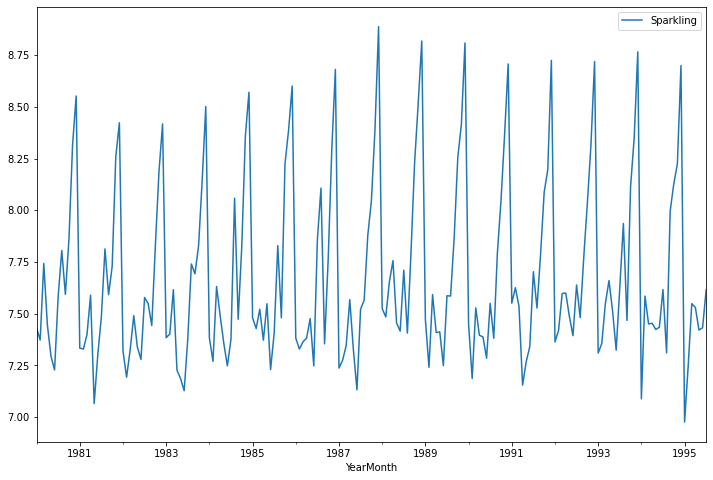

In [271]:
#Let's try to do log transformation
df_log = df.copy()

df_log['Sparkling'] = np.log(df)

df_log.Sparkling

#Visualize the log transformed series
df_log.plot()
plt.show()

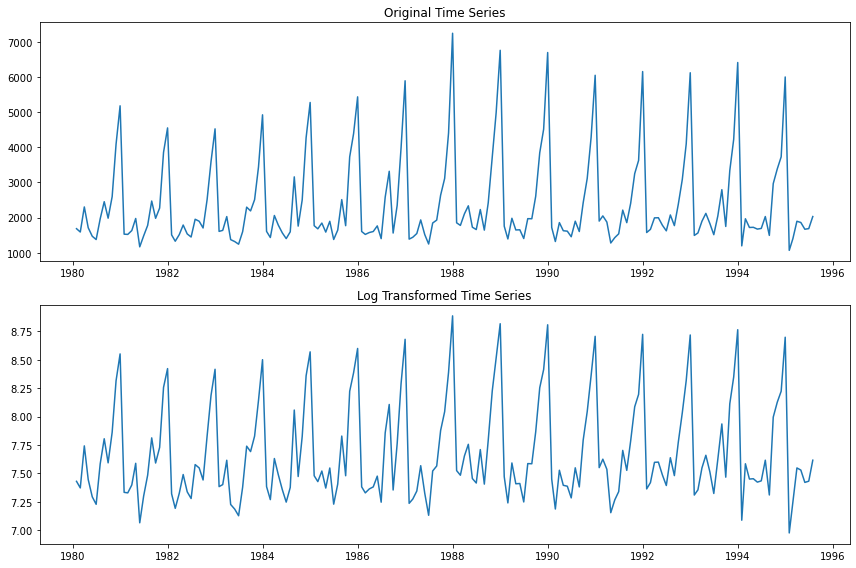

In [272]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()

# Data Pre-processing

In [273]:
train = df[0:int(len(df)*0.7)] 
test = df[int(len(df)*0.7):]

In [274]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


In [275]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-31,1686.0
1980-02-29,1591.0
1980-03-31,2304.0
1980-04-30,1712.0
1980-05-31,1471.0


Last few rows of Training Data


,Sparkling
YearMonth,
1990-06-30,1457.0
1990-07-31,1899.0
1990-08-31,1605.0
1990-09-30,2424.0
1990-10-31,3116.0


First few rows of Test Data


,Sparkling
YearMonth,
1990-11-30,4286.0
1990-12-31,6047.0
1991-01-31,1902.0
1991-02-28,2049.0
1991-03-31,1874.0


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-31,1897.0
1995-04-30,1862.0
1995-05-31,1670.0
1995-06-30,1688.0
1995-07-31,2031.0


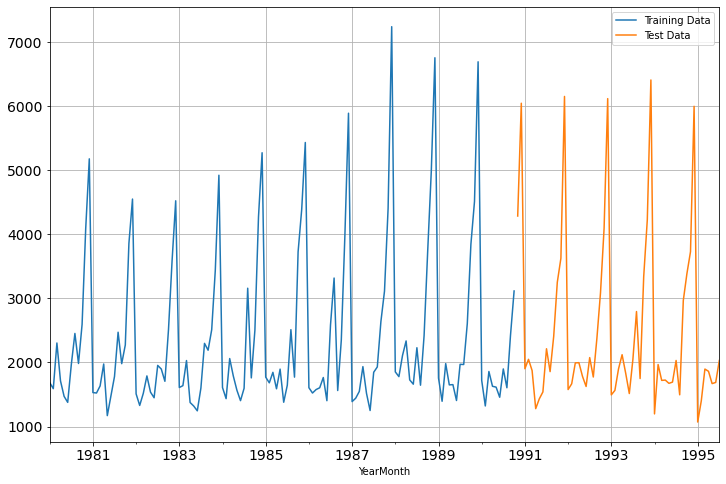

In [276]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model Building - Original Data

## Linear Regression 

In [277]:
# Generate numerical time instance order for training set
train_time = [i+1 for i in range(len(train))]

# Generate numerical time instance order for test set
test_time = [i+len(train) for i in range(len(test))]

# Print the generated time instance orders
print('Training Time instance:\n', train_time)
print('Test Time instance:\n', test_time)

Training Time instance:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance:
 [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [278]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [279]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-31     1686.0     1
1980-02-29     1591.0     2
1980-03-31     2304.0     3
1980-04-30     1712.0     4
1980-05-31     1471.0     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-06-30     1457.0   126
1990-07-31     1899.0   127
1990-08-31     1605.0   128
1990-09-30     2424.0   129
1990-10-31     3116.0   130 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1990-11-30     4286.0   130
1990-12-31     6047.0   131
1991-01-31     1902.0   132
1991-02-28     2049.0   133
1991-03-31     1874.0   134 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-31     1897.0   182
1995-04-30     1862.0   183
1995-05-31     1670.0   184
1995-06-30     1688.0   185
1995-07-31     2031.0   186 



In [280]:
lr = LinearRegression()

In [281]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

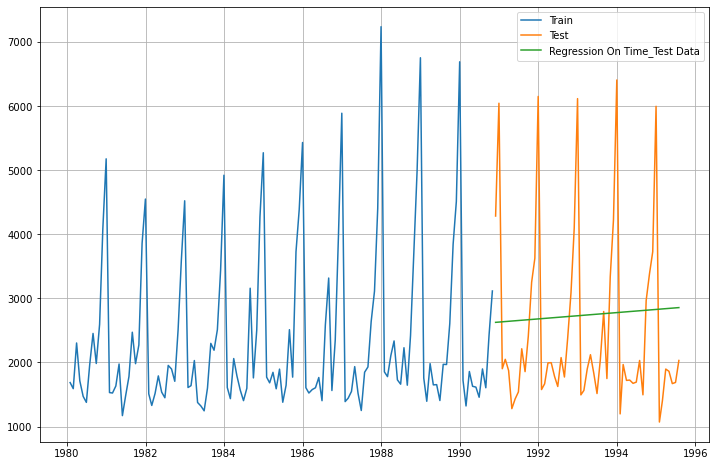

In [282]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Model Evaluation 

In [283]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1391.709 


In [284]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1391.708631


## Naive Approach 

In [285]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [286]:
train.tail()

,Sparkling
YearMonth,
1990-06-30,1457.0
1990-07-31,1899.0
1990-08-31,1605.0
1990-09-30,2424.0
1990-10-31,3116.0


In [287]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1990-11-30    3116.0
1990-12-31    3116.0
1991-01-31    3116.0
1991-02-28    3116.0
1991-03-31    3116.0
Freq: M, Name: naive, dtype: float64

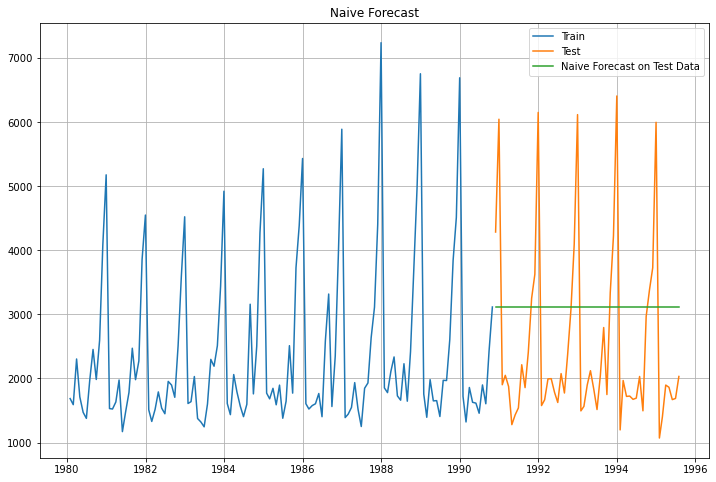

In [288]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation 

In [289]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1496.445


In [290]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1391.708631
NaiveModel,1496.444629


## Simple Average 

In [291]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [292]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1990-11-30,4286.0,2361.276923
1990-12-31,6047.0,2361.276923
1991-01-31,1902.0,2361.276923
1991-02-28,2049.0,2361.276923
1991-03-31,1874.0,2361.276923


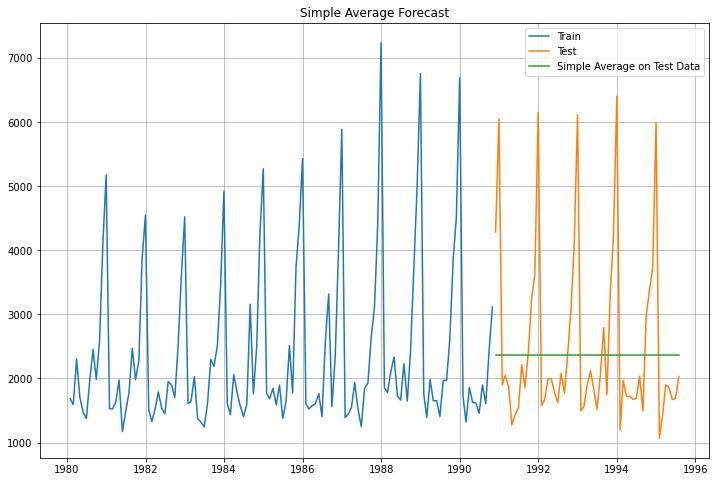

In [293]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation 

In [294]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1368.747


In [295]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1391.708631
NaiveModel,1496.444629
SimpleAverageModel,1368.746717


## Moving Average(MA) 

In [296]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-31,1686.0
1980-02-29,1591.0
1980-03-31,2304.0
1980-04-30,1712.0
1980-05-31,1471.0


In [297]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-31,1686.0,NaN,NaN,NaN,NaN
1980-02-29,1591.0,1638.5,NaN,NaN,NaN
1980-03-31,2304.0,1947.5,NaN,NaN,NaN
1980-04-30,1712.0,2008.0,1823.25,NaN,NaN
1980-05-31,1471.0,1591.5,1769.50,NaN,NaN


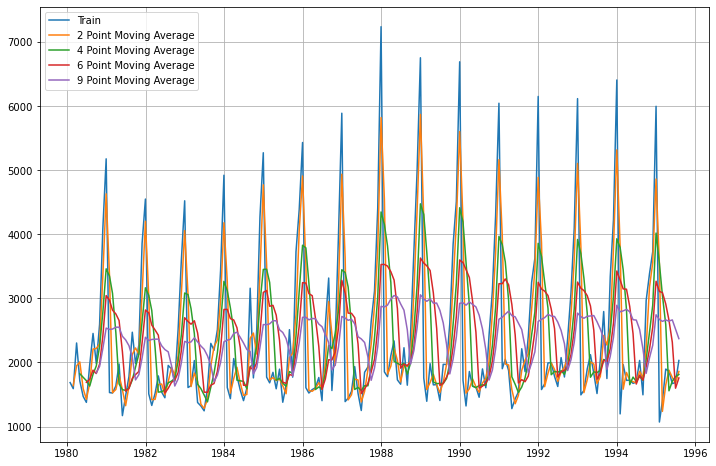

In [298]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [299]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

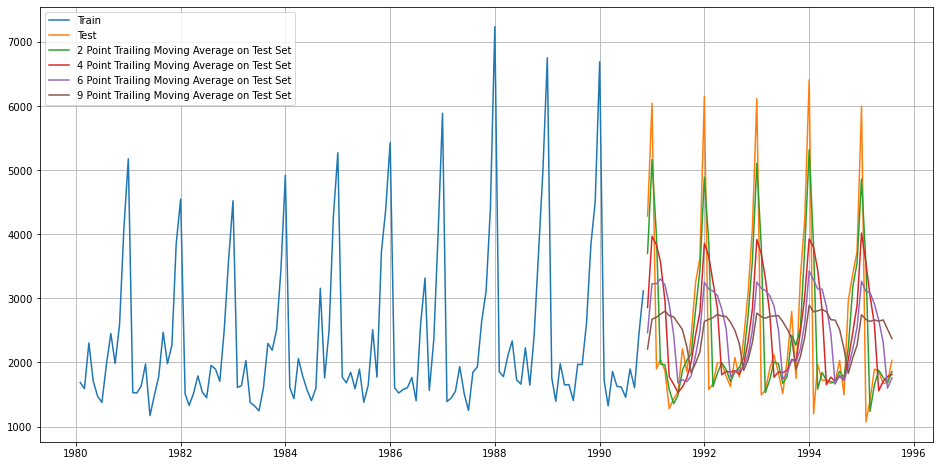

In [300]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [301]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 811.179
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1184.213
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1337.201
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1422.653


In [302]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1391.708631
NaiveModel,1496.444629
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281


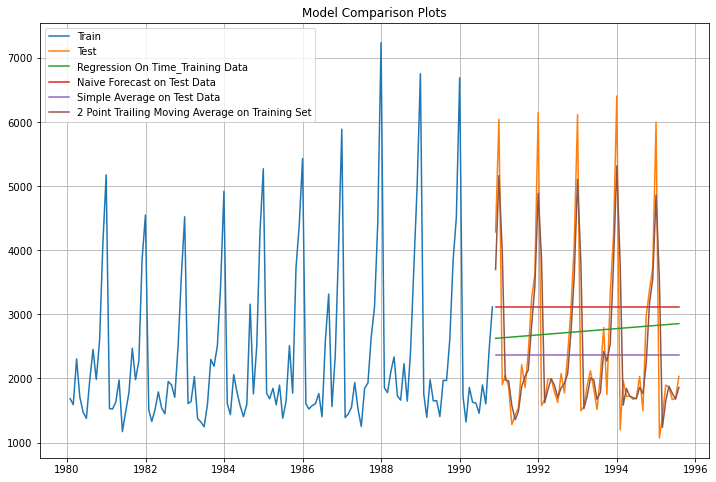

In [303]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Simple Exponential Smoothening Models 

In [304]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [305]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [306]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.04844277717441349,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2160.089750219885,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [307]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1990-11-30    2462.729147
1990-12-31    2462.729147
1991-01-31    2462.729147
1991-02-28    2462.729147
1991-03-31    2462.729147
1991-04-30    2462.729147
1991-05-31    2462.729147
1991-06-30    2462.729147
1991-07-31    2462.729147
1991-08-31    2462.729147
1991-09-30    2462.729147
1991-10-31    2462.729147
1991-11-30    2462.729147
1991-12-31    2462.729147
1992-01-31    2462.729147
1992-02-29    2462.729147
1992-03-31    2462.729147
1992-04-30    2462.729147
1992-05-31    2462.729147
1992-06-30    2462.729147
1992-07-31    2462.729147
1992-08-31    2462.729147
1992-09-30    2462.729147
1992-10-31    2462.729147
1992-11-30    2462.729147
1992-12-31    2462.729147
1993-01-31    2462.729147
1993-02-28    2462.729147
1993-03-31    2462.729147
1993-04-30    2462.729147
1993-05-31    2462.729147
1993-06-30    2462.729147
1993-07-31    2462.729147
1993-08-31    2462.729147
1993-09-30    2462.729147
1993-10-31    2462.729147
1993-11-30    2462.729147
1993-12-31    2462.729147
1994-01-31  

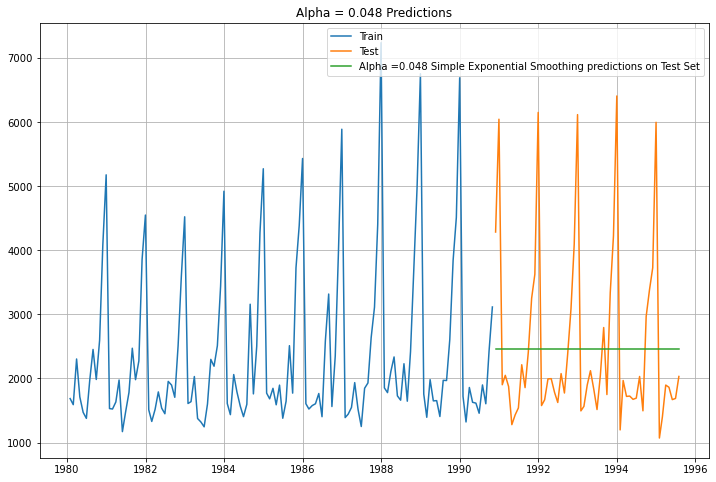

In [308]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.048 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.048 Predictions');

In [309]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [310]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1362.488304892539
SES RMSE (calculated using statsmodels): 1362.488304892539


In [311]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.048,SES'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1391.708631
NaiveModel,1496.444629
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.048,SES",1362.488305


## Holt - ETS(A, A, N) - Holt's linear method with additive errors
## Double Exponential Smoothing¶ 

In [312]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0761400161474666, 'smoothing_trend': 0.0761400161474666, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.8019295653833, 'initial_trend': 2.7687300829170596, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [313]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1990-11-30    2406.739590
1990-12-31    2390.171005
1991-01-31    2373.602420
1991-02-28    2357.033835
1991-03-31    2340.465250
1991-04-30    2323.896665
1991-05-31    2307.328080
1991-06-30    2290.759495
1991-07-31    2274.190910
1991-08-31    2257.622325
1991-09-30    2241.053740
1991-10-31    2224.485155
1991-11-30    2207.916570
1991-12-31    2191.347985
1992-01-31    2174.779400
1992-02-29    2158.210815
1992-03-31    2141.642230
1992-04-30    2125.073645
1992-05-31    2108.505060
1992-06-30    2091.936475
1992-07-31    2075.367891
1992-08-31    2058.799306
1992-09-30    2042.230721
1992-10-31    2025.662136
1992-11-30    2009.093551
1992-12-31    1992.524966
1993-01-31    1975.956381
1993-02-28    1959.387796
1993-03-31    1942.819211
1993-04-30    1926.250626
1993-05-31    1909.682041
1993-06-30    1893.113456
1993-07-31    1876.544871
1993-08-31    1859.976286
1993-09-30    1843.407701
1993-10-31    1826.839116
1993-11-30    1810.270531
1993-12-31    1793.701946
1994-01-31  

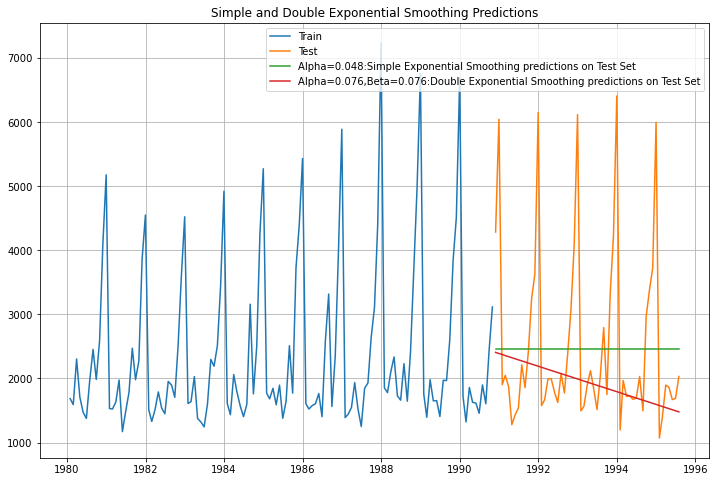

In [314]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.048:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.076,Beta=0.076:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [315]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 1472.2536598820277


In [316]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,1391.708631
NaiveModel,1496.444629
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.048,SES",1362.488305
"Alpha=1,Beta=0.0189:DES",1472.253660


## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors 

In [317]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.06864265433647299, 'smoothing_trend': 0.026479917365858134, 'smoothing_seasonal': 0.527803911393165, 'damping_trend': nan, 'initial_level': 2336.242149274189, 'initial_trend': -0.08422571532769768, 'initial_seasons': array([-667.33068823, -747.36772111, -341.32893693, -497.13060491,
       -847.23021514, -852.47243433, -392.12722622,  102.95133587,
       -286.60105971,  254.99920657, 1612.16914405, 2641.61578013]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [318]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1990-11-30    4511.924606
1990-12-31    6590.369950
1991-01-31    1634.330100
1991-02-28    1322.514331
1991-03-31    1818.492326
1991-04-30    1657.662569
1991-05-31    1575.251989
1991-06-30    1393.873085
1991-07-31    1906.779453
1991-08-31    1735.972175
1991-09-30    2420.242952
1991-10-31    3585.954527
1991-11-30    4515.107080
1991-12-31    6593.552424
1992-01-31    1637.512574
1992-02-29    1325.696805
1992-03-31    1821.674800
1992-04-30    1660.845043
1992-05-31    1578.434463
1992-06-30    1397.055559
1992-07-31    1909.961927
1992-08-31    1739.154649
1992-09-30    2423.425426
1992-10-31    3589.137001
1992-11-30    4518.289554
1992-12-31    6596.734898
1993-01-31    1640.695048
1993-02-28    1328.879279
1993-03-31    1824.857274
1993-04-30    1664.027517
1993-05-31    1581.616937
1993-06-30    1400.238033
1993-07-31    1913.144401
1993-08-31    1742.337123
1993-09-30    2426.607900
1993-10-31    3592.319475
1993-11-30    4521.472028
1993-12-31    6599.917372
1994-01-31  

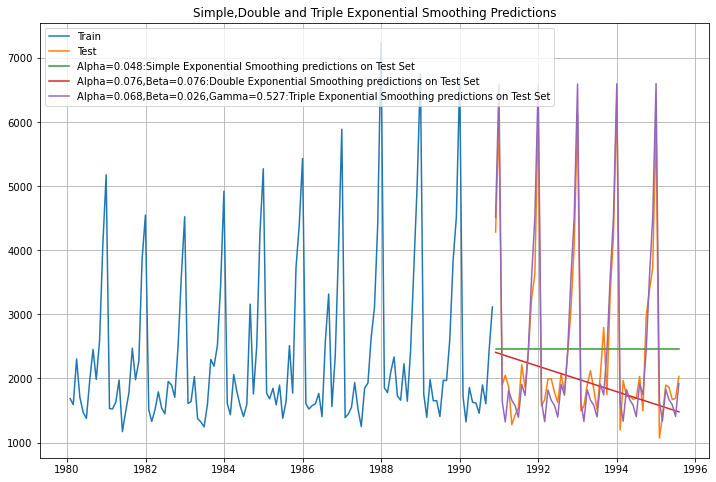

In [319]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.048:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.076,Beta=0.076:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.068,Beta=0.026,Gamma=0.527:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [320]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 377.3607522826444


In [321]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,1391.708631
NaiveModel,1496.444629
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.048,SES",1362.488305
"Alpha=1,Beta=0.0189:DES",1472.253660
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",377.360752


## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [322]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters linear method ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters linear method ==

{'smoothing_level': 0.07571424250736064, 'smoothing_trend': 0.06489787301062888, 'smoothing_seasonal': 0.3765612744638665, 'damping_trend': nan, 'initial_level': 2356.5416926740136, 'initial_trend': -9.182362358264044, 'initial_seasons': array([0.71201168, 0.67834969, 0.89641808, 0.79721172, 0.64104241,
       0.63973575, 0.86627157, 1.11331732, 0.89739574, 1.18446882,
       1.83411692, 2.32756901]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [323]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1990-11-30    4327.600082
1990-12-31    6208.849802
1991-01-31    1621.600404
1991-02-28    1379.868689
1991-03-31    1791.915198
1991-04-30    1679.451390
1991-05-31    1560.823429
1991-06-30    1371.906348
1991-07-31    1874.422777
1991-08-31    1824.450985
1991-09-30    2288.013628
1991-10-31    3240.901456
1991-11-30    4185.622237
1991-12-31    6004.594384
1992-01-31    1568.107213
1992-02-29    1334.224243
1992-03-31    1732.476888
1992-04-30    1623.589121
1992-05-31    1508.762685
1992-06-30    1326.019324
1992-07-31    1811.552527
1992-08-31    1763.085324
1992-09-30    2210.839660
1992-10-31    3131.278757
1992-11-30    4043.644392
1992-12-31    5800.338966
1993-01-31    1514.614021
1993-02-28    1288.579797
1993-03-31    1673.038578
1993-04-30    1567.726852
1993-05-31    1456.701940
1993-06-30    1280.132299
1993-07-31    1748.682278
1993-08-31    1701.719662
1993-09-30    2133.665691
1993-10-31    3021.656058
1993-11-30    3901.666546
1993-12-31    5596.083548
1994-01-31  

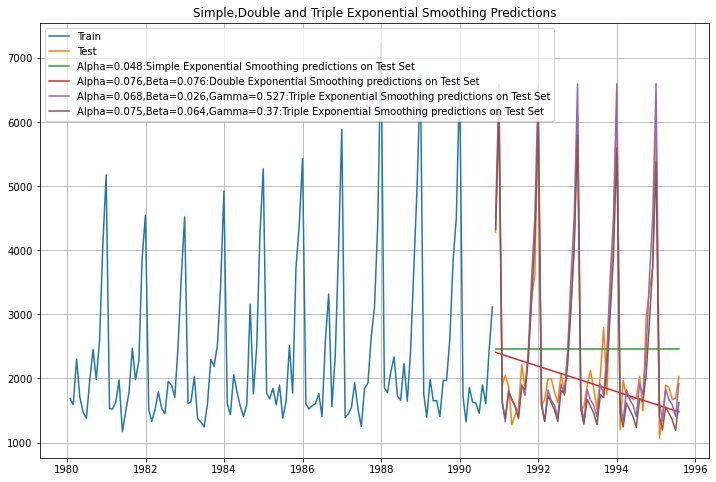

In [324]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.048:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.076,Beta=0.076:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.068,Beta=0.026,Gamma=0.527:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.075,Beta=0.064,Gamma=0.37:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [325]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 381.6553661142565


In [326]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
RegressionOnTime,1391.708631
NaiveModel,1496.444629
SimpleAverageModel,1368.746717
2pointTrailingMovingAverage,811.178937
4pointTrailingMovingAverage,1184.213295
6pointTrailingMovingAverage,1337.200524
9pointTrailingMovingAverage,1422.653281
"Alpha=0.048,SES",1362.488305
"Alpha=1,Beta=0.0189:DES",1472.253660
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",377.360752


# Check for stationarity of the whole Time Series data.

In [328]:
dftest = adfuller(df)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


In [342]:
monthly_sales_data = pd.pivot_table(df, values = "Sparkling", columns = df.index.year, index = df.index.month_name())
monthly_sales_data

YearMonth,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
YearMonth,,,,,,,,,,,,,,,,
April,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
August,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
December,5179.0,4551.0,4524.0,4923.0,5274.0,5434.0,5891.0,7242.0,6757.0,6694.0,6047.0,6153.0,6119.0,6410.0,5999.0,NaN
February,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
January,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
July,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
June,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
March,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0


In [343]:
monthly_sales_data = monthly_sales_data.reindex(index = ['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
monthly_sales_data

YearMonth,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
YearMonth,,,,,,,,,,,,,,,,
January,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
February,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
March,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
April,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
June,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
July,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
August,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
September,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


<AxesSubplot:xlabel='YearMonth'>

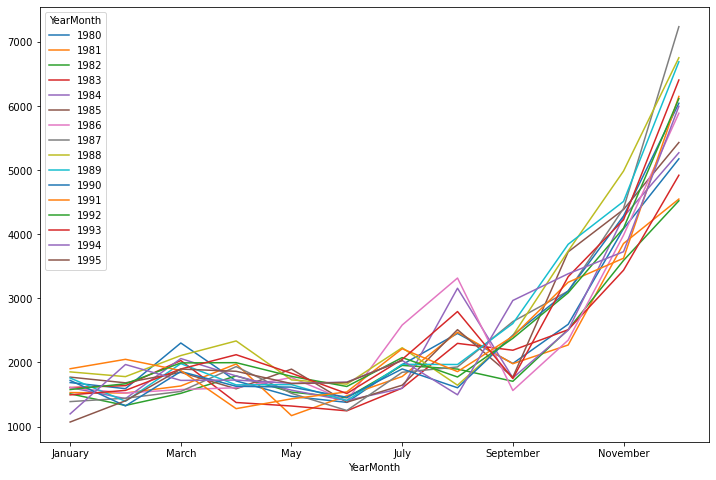

In [344]:
monthly_sales_data.plot()

In [345]:
yearly_sales_data = pd.pivot_table(df, values = "Sparkling", columns = df.index.month_name(), index = df.index.year)
yearly_sales_data = yearly_sales_data[['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
yearly_sales_data

YearMonth,January,February,March,April,May,June,July,August,September,October,November,December
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


<AxesSubplot:xlabel='YearMonth'>

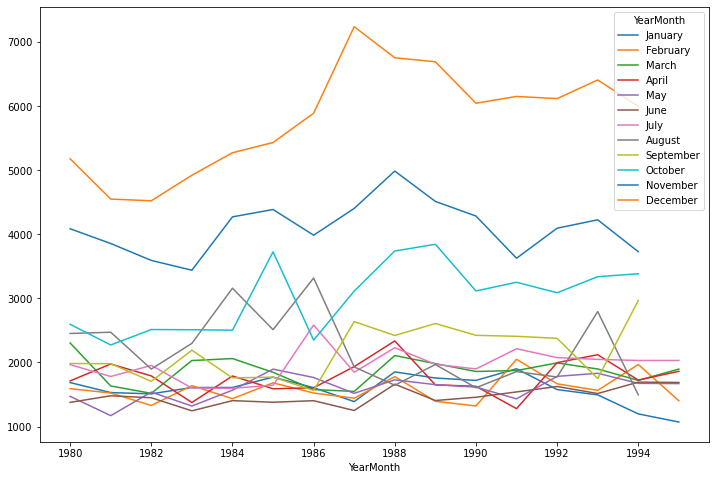

In [346]:
yearly_sales_data.plot()

<AxesSubplot:>

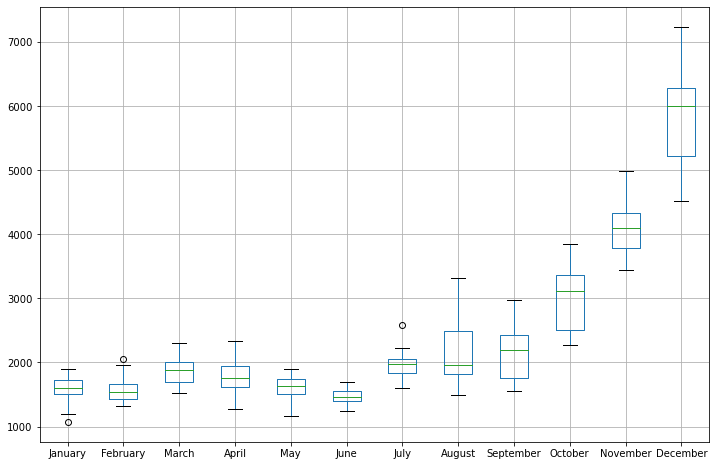

In [347]:
yearly_sales_data.boxplot()

In [351]:
result = adfuller(df)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

# If p-value is greater than 0.05, the data is non-stationary and may need to be made stationary

# Make the data stationary (if needed)
if result[1] > 0.05:
    # Perform differencing
    differenced_data = df.diff().dropna()
    # Or perform decomposition
    # decomposed_result = seasonal_decompose(time_series_data, model='additive')
    # stationary_data = decomposed_result.resid.dropna()
    print('Data made stationary.')
else:
    print('Data is already stationary.')

ADF Statistic: -1.3604974548123385
p-value: 0.6010608871634847
Critical Values:
	1%: -3.4682803641749267
	5%: -2.8782017240816327
	10%: -2.5756525795918366
Data made stationary.


Text(0, 0.5, 'Sales')

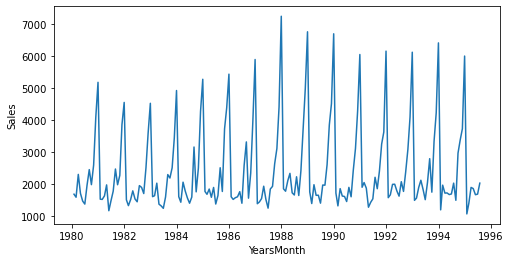

In [348]:
plt.figure(figsize=(8, 4))
plt.plot(df)
plt.xlabel('YearsMonth')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

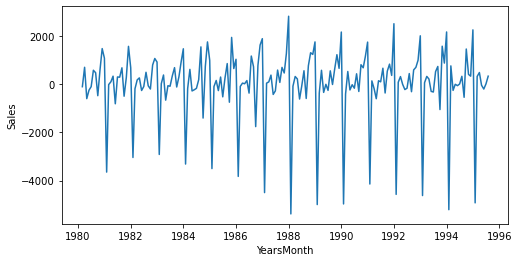

In [349]:
# Performing differencing ( d=1 ) as the data is non-stationary
plt.figure(figsize=(8, 4))
plt.plot(df.diff(periods=1))
plt.xlabel('YearsMonth')
plt.ylabel('Sales')

# Auto Regressive(AR) Models

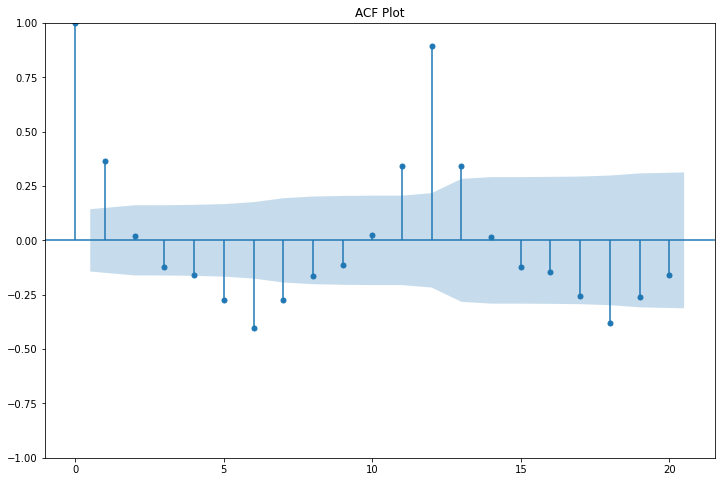

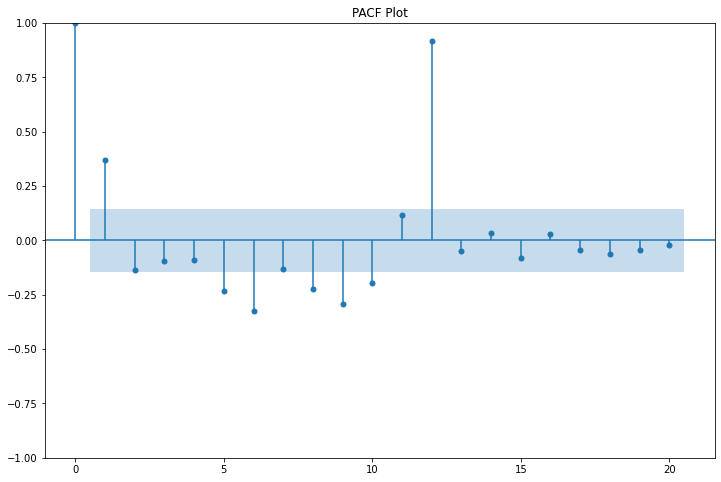

In [361]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Generate ACF plot
plot_acf(df, lags=20)
plt.title('ACF Plot')
plt.show()

# Generate PACF plot
plot_pacf(df, lags=20)
plt.title('PACF Plot')
plt.show()

In [362]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)

In [363]:
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)


In [365]:
import itertools
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [366]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [367]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [368]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [369]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [370]:
dftest = adfuller(train['Sparkling'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.156
DF test p-value is 0.6922


In [385]:
df_log = np.log10(train['Sparkling'])
#Log transformation on the training data to make the time series stationary as we did with full data 

In [386]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# AR Model

In [373]:
# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [374]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(df_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC:-95.1655160861931
ARIMA(2, 0, 0) - AIC:-99.68657925798004
ARIMA(3, 0, 0) - AIC:-97.69004308501516


In [375]:
best_model = ARIMA(df_log,order = (2,0,0))#p=2 with lowest AIC 
best_results = best_model.fit()

In [376]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  53.843
Date:                Sun, 17 Mar 2024   AIC                            -99.687
Time:                        20:50:21   BIC                            -88.216
Sample:                    01-31-1980   HQIC                           -95.026
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3287      0.030    110.321      0.000       3.270       3.388
ar.L1          0.5503      0.125      4.406      0.000       0.306       0.795
ar.L2         -0.2206      0.153     -1.440      0.1

In [377]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-11-30'), dynamic=True, full_results=True)

In [378]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [379]:
# Extract the predicted and true values of our time series
df_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['df_forecasted'] = np.power(10, pred99.predicted_mean)

In [381]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['df_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1398.059


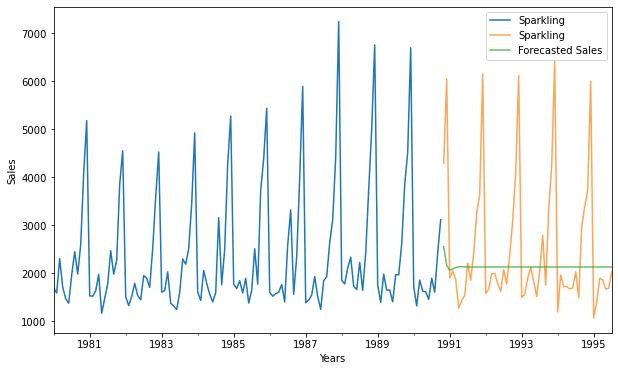

In [382]:
axis = train['Sparkling'].plot(label='Sparkling', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Sparkling', alpha=0.7)
testCopy1['df_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [383]:
resultsDf_10 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best AR Model : ARIMA(2,0,0)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,RMSE
"Best AR Model : ARIMA(2,0,0)",1398.059012


In [384]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [387]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(df_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-98.54420977119052
ARIMA(1, 0, 2) - AIC:-97.83219584233899
ARIMA(1, 0, 3) - AIC:-104.72240702781478
ARIMA(2, 0, 1) - AIC:-108.5506632161827
ARIMA(2, 0, 2) - AIC:-98.02999993411939
ARIMA(2, 0, 3) - AIC:-102.7425383121268
ARIMA(3, 0, 1) - AIC:-95.70080922533107
ARIMA(3, 0, 2) - AIC:-104.65542172665006
ARIMA(3, 0, 3) - AIC:-136.14586571103808


In [388]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
8,"(3, 0, 3)",-136.145866
3,"(2, 0, 1)",-108.550663
2,"(1, 0, 3)",-104.722407
7,"(3, 0, 2)",-104.655422
5,"(2, 0, 3)",-102.742538


In [389]:
best_model = ARIMA(df_log,order = (3,0,3))
best_results = best_model.fit()

In [390]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  76.073
Date:                Sun, 17 Mar 2024   AIC                           -136.146
Time:                        21:16:38   BIC                           -113.206
Sample:                    01-31-1980   HQIC                          -126.824
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3330      0.012    281.782      0.000       3.310       3.356
ar.L1          0.7438      0.157      4.731      0.000       0.436       1.052
ar.L2          0.7133      0.274      2.605      0.0

In [395]:
#Calculating RMSE for best MA model

In [391]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-11-30'), dynamic=True, full_results=True)

In [392]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [393]:
# Extract the predicted and true values of our time series
df_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['df_forecasted'] = np.power(10, pred99.predicted_mean)

In [394]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['df_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1021.304


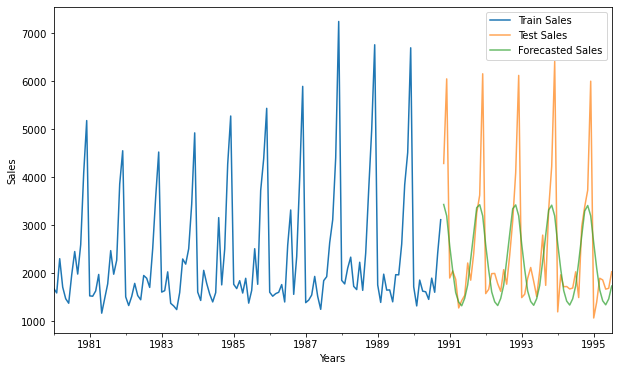

In [396]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['df_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [397]:
resultsDf_11 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARMA Model : ARIMA(3,0,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,RMSE
"Best AR Model : ARIMA(2,0,0)",1398.059012
"Best ARMA Model : ARIMA(3,0,3)",1021.304310


In [398]:
# ARIMA Model building to estimate best 'p' , 'd' , 'q' paramters ( Lowest AIC Approach )

In [399]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [400]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(df_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-98.54420977119052
ARIMA(1, 0, 2) - AIC:-97.83219584233899
ARIMA(1, 0, 3) - AIC:-104.72240702781478
ARIMA(1, 1, 1) - AIC:-89.72699386532258
ARIMA(1, 1, 2) - AIC:-92.88868323561059
ARIMA(1, 1, 3) - AIC:-92.19710301716415
ARIMA(2, 0, 1) - AIC:-108.5506632161827
ARIMA(2, 0, 2) - AIC:-98.02999993411939
ARIMA(2, 0, 3) - AIC:-102.7425383121268
ARIMA(2, 1, 1) - AIC:-93.80623961399542
ARIMA(2, 1, 2) - AIC:-95.40256667657556
ARIMA(2, 1, 3) - AIC:-97.83338660380619
ARIMA(3, 0, 1) - AIC:-95.70080922533107
ARIMA(3, 0, 2) - AIC:-104.65542172665006
ARIMA(3, 0, 3) - AIC:-136.14586571103808
ARIMA(3, 1, 1) - AIC:-66.48539925639312
ARIMA(3, 1, 2) - AIC:-97.36773557660752
ARIMA(3, 1, 3) - AIC:-117.60429542318488


In [401]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
14,"(3, 0, 3)",-136.145866
17,"(3, 1, 3)",-117.604295
6,"(2, 0, 1)",-108.550663
2,"(1, 0, 3)",-104.722407
13,"(3, 0, 2)",-104.655422


In [402]:
# Building ARIMA model with best parameters p,d,q

In [404]:
best_model = ARIMA(df_log,order = (3,0,3))
best_results = best_model.fit()

In [405]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  130
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  76.073
Date:                Sun, 17 Mar 2024   AIC                           -136.146
Time:                        21:23:03   BIC                           -113.206
Sample:                    01-31-1980   HQIC                          -126.824
                         - 10-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3330      0.012    281.782      0.000       3.310       3.356
ar.L1          0.7438      0.157      4.731      0.000       0.436       1.052
ar.L2          0.7133      0.274      2.605      0.0

In [406]:
# Calculating RMSE for best ARIMA model 

In [407]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-11-30'), dynamic=True, full_results=True)

In [408]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [409]:
# Extract the predicted and true values of our time series
df_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['df_forecasted'] = np.power(10, pred99.predicted_mean)

In [410]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['df_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1021.304


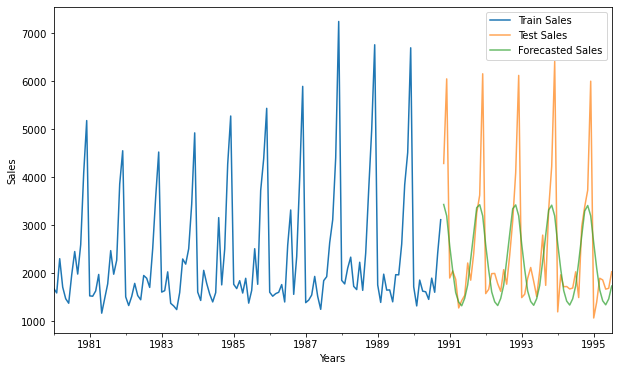

In [411]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['df_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [412]:
resultsDf_12 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(3,0,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

,RMSE
"Best AR Model : ARIMA(2,0,0)",1398.059012
"Best ARMA Model : ARIMA(3,0,3)",1021.304310
"Best ARIMA Model : ARIMA(3,0,3)",1021.304310


In [413]:
# SARIMA Model

In [414]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

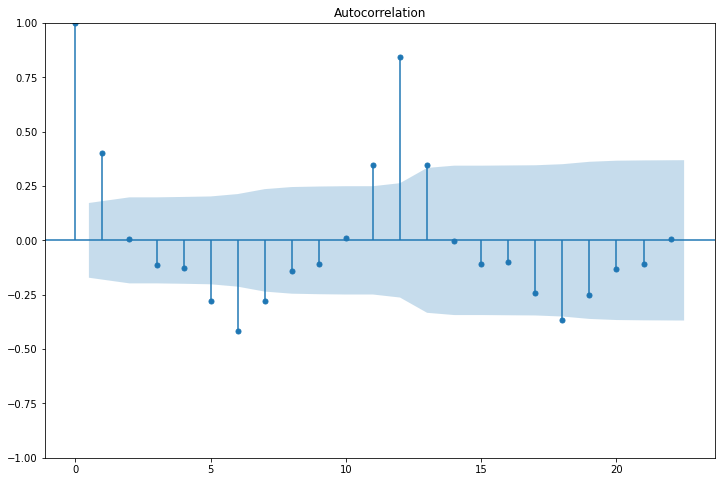

In [415]:
plot_acf(train['Sparkling'],alpha=0.05);

In [416]:
#SARIMA Model building to estimate best parameters

In [417]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [418]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [422]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(df_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.49413D-01    |proj g|=  3.73035D+00

At iterate    5    f= -9.37839D-01    |proj g|=  1.91768D+00

At iterate   10    f= -1.06941D+00    |proj g|=  8.90009D+00

At iterate   15    f= -1.12422D+00    |proj g|=  8.75079D-02

At iterate   20    f= -1.12541D+00    |proj g|=  9.20784D-01


 This problem is unconstrained.



At iterate   25    f= -1.12999D+00    |proj g|=  4.14076D-02

At iterate   30    f= -1.13000D+00    |proj g|=  6.42202D-02

At iterate   35    f= -1.13021D+00    |proj g|=  2.35866D+00

At iterate   40    f= -1.13170D+00    |proj g|=  4.37905D-01

At iterate   45    f= -1.13174D+00    |proj g|=  3.63257D-02

At iterate   50    f= -1.13175D+00    |proj g|=  3.58789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     52     72      1     0     0   3.760D-04  -1.132D+00
  F =  -1.1317514360289032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:-284.2553733675

 This problem is unconstrained.



At iterate    5    f= -9.31904D-01    |proj g|=  1.41797D+00

At iterate   10    f= -9.85634D-01    |proj g|=  6.57436D-01

At iterate   15    f= -9.86210D-01    |proj g|=  1.76629D-01

At iterate   20    f= -9.86389D-01    |proj g|=  5.33138D-03

At iterate   25    f= -9.86421D-01    |proj g|=  2.78428D-01

At iterate   30    f= -9.88994D-01    |proj g|=  1.72089D-01

At iterate   35    f= -9.99645D-01    |proj g|=  1.05928D-01

At iterate   40    f= -9.99673D-01    |proj g|=  5.00629D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     75      1     0     0   6.705D-03  -9.997D-01
  F = -0.999672876564

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83242D+01    |proj g|=  3.68258D+00
  ys=-4.680E+01  -gs= 6.971E-01 BFGS update SKIPPED
  ys=-2.279E+01  -gs= 6.885E-01 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     43      3     2     0   8.556D+03   1.281D+01
  F =   12.809351235063387     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:3344.4313211164804
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.69286D-01    |proj g|=  1.20650D+00

At iterate    5    f= -9.75319D-01    |proj g|=  9.14538D-02


 This problem is unconstrained.



At iterate   10    f= -9.79647D-01    |proj g|=  4.45079D-01

At iterate   15    f= -9.81366D-01    |proj g|=  3.11409D-01

At iterate   20    f= -9.81994D-01    |proj g|=  7.75242D-04

At iterate   25    f= -9.81994D-01    |proj g|=  6.94250D-03

At iterate   30    f= -9.85122D-01    |proj g|=  2.06045D-01

At iterate   35    f= -9.87112D-01    |proj g|=  2.30139D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     61      1     0     0   8.914D-06  -9.871D-01
  F = -0.98712925248789973     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:-246.6536056468

 This problem is unconstrained.



At iterate    5    f= -8.57667D-01    |proj g|=  1.86101D-01

At iterate   10    f= -8.62744D-01    |proj g|=  9.56188D-02

At iterate   15    f= -8.62808D-01    |proj g|=  6.30155D-03

At iterate   20    f= -8.62846D-01    |proj g|=  3.42781D-02

At iterate   25    f= -8.63006D-01    |proj g|=  5.62119D-03

At iterate   30    f= -8.63878D-01    |proj g|=  2.74126D-01

At iterate   35    f= -8.64871D-01    |proj g|=  2.10188D-01

At iterate   40    f= -8.68133D-01    |proj g|=  1.56402D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45    101      2     0     0   3.458D-04  -8.682D-01
  F = -0.86817456354257527     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:-213.72538652106957
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87508D+01    |proj g|=  8.07201D+00


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     36      1     0     0   6.824D+04   1.239D+01
  F =   12.392029693072965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:3235.9277201989707
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.00386D-01    |proj g|=  3.31336D+00


 This problem is unconstrained.



At iterate    5    f= -9.12716D-01    |proj g|=  1.57469D+00

At iterate   10    f= -9.86611D-01    |proj g|=  1.02214D+00

At iterate   15    f= -9.91402D-01    |proj g|=  5.08895D-01

At iterate   20    f= -9.97065D-01    |proj g|=  2.29128D-02

At iterate   25    f= -9.98562D-01    |proj g|=  1.28973D+00

At iterate   30    f= -9.99643D-01    |proj g|=  3.12297D-03

At iterate   35    f= -9.99645D-01    |proj g|=  1.89891D-02

At iterate   40    f= -9.99838D-01    |proj g|=  1.25149D-01

At iterate   45    f= -9.99973D-01    |proj g|=  1.29662D-01

At iterate   50    f= -1.00070D+00    |proj g|=  2.89047D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -9.75012D-01    |proj g|=  3.71454D+00

At iterate   10    f= -9.93900D-01    |proj g|=  3.36264D-01

At iterate   15    f= -9.98768D-01    |proj g|=  3.72535D-02

At iterate   20    f= -9.99074D-01    |proj g|=  6.85586D-01

At iterate   25    f= -1.00227D+00    |proj g|=  6.72462D-01

At iterate   30    f= -1.00262D+00    |proj g|=  2.00162D-02

At iterate   35    f= -1.00264D+00    |proj g|=  1.47891D-01

At iterate   40    f= -1.00272D+00    |proj g|=  1.73647D-02

At iterate   45    f= -1.00272D+00    |proj g|=  4.31133D-03

At iterate   50    f= -1.00274D+00    |proj g|=  7.72019D-02

At iterate   55    f= -1.00294D+00    |proj g|=  2.75457D-02

At iterate   60    f= -1.00294D+00    |proj g|=  1.23507D-02

At iterate   65    f= -1.00294D+00    |proj g|=  2.89509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-4.551E+01  -gs= 6.970E-01 BFGS update SKIPPED
  ys=-3.217E+01  -gs= 6.927E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     43      3     2     0   1.159D+04   1.157D+01
  F =   11.566612559599477     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:3023.319265495864
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.66710D-01    |proj g|=  1.07185D+00


 This problem is unconstrained.



At iterate    5    f= -8.70695D-01    |proj g|=  6.08453D-02

At iterate   10    f= -8.70974D-01    |proj g|=  1.10857D-01

At iterate   15    f= -8.71016D-01    |proj g|=  3.29043D-02

At iterate   20    f= -8.71215D-01    |proj g|=  3.04309D-02

At iterate   25    f= -8.71465D-01    |proj g|=  2.46659D-02

At iterate   30    f= -8.71687D-01    |proj g|=  3.07306D-02

At iterate   35    f= -8.73452D-01    |proj g|=  1.71337D-01

At iterate   40    f= -8.74879D-01    |proj g|=  3.65234D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     98      2     0     0   6.716D-05  -8.749D-01
  F = -0.87487964166071397     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:-215.46870683178562



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.20293D-01    |proj g|=  6.28624D-01

At iterate    5    f= -8.42159D-01    |proj g|=  8.70163D-02

At iterate   10    f= -8.49633D-01    |proj g|=  7.42711D-01

At iterate   15    f= -8.55287D-01    |proj g|=  5.45771D-01

At iterate   20    f= -8.59847D-01    |proj g|=  6.89541D-02

At iterate   25    f= -8.60061D-01    |proj g|=  3.26550D-02

At iterate   30    f= -8.60474D-01    |proj g|=  3.25485D-01

At iterate   35    f= -8.60930D-01    |proj g|=  4.73945D-02

At iterate   40    f= -8.60980D-01    |proj g|=  4.91462D-03

At iterate   45    f= -8.61036D-01    |proj g|=  6.57140D-02

At iterate   50    f= -8.61166D-01    |proj g|=  2.59973D-02

At iterate   55    f= -8.63024D-01    |proj g|=  4.06992D-02

At iterate   60    f= -8.64985D-01    |proj g|=  2.58848D-02

At iterate   65    f= -8.6

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3     59      2     0     0   6.824D+04   1.172D+01
  F =   11.721356092552940     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:3063.5525840637642
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.43593D-01    |proj g|=  2.91087D+00


 This problem is unconstrained.



At iterate    5    f= -8.14589D-01    |proj g|=  2.84420D-01

At iterate   10    f= -8.69221D-01    |proj g|=  7.28641D-01

At iterate   15    f= -8.73841D-01    |proj g|=  1.55996D-02

At iterate   20    f= -8.74086D-01    |proj g|=  2.38172D-01

At iterate   25    f= -8.75371D-01    |proj g|=  2.11804D-01

At iterate   30    f= -8.75632D-01    |proj g|=  1.32843D-01

At iterate   35    f= -8.77029D-01    |proj g|=  1.54138D-01

At iterate   40    f= -8.77373D-01    |proj g|=  1.48606D-02

At iterate   45    f= -8.78015D-01    |proj g|=  2.22352D-01

At iterate   50    f= -8.81894D-01    |proj g|=  1.21832D-01

At iterate   55    f= -8.82239D-01    |proj g|=  8.87264D-02

At iterate   60    f= -8.82505D-01    |proj g|=  1.21870D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.30386D-01    |proj g|=  2.88535D+00

At iterate    5    f= -8.54888D-01    |proj g|=  1.69310D+00

At iterate   10    f= -8.76946D-01    |proj g|=  2.87233D-01

At iterate   15    f= -8.77000D-01    |proj g|=  1.35668D-01

At iterate   20    f= -8.78568D-01    |proj g|=  7.23847D-01

At iterate   25    f= -8.78932D-01    |proj g|=  2.23350D-02

At iterate   30    f= -8.78983D-01    |proj g|=  8.40400D-02

At iterate   35    f= -8.79192D-01    |proj g|=  4.63879D-02

At iterate   40    f= -8.79468D-01    |proj g|=  7.89562D-03

At iterate   45    f= -8.79475D-01    |proj g|=  1.23338D-01

At iterate   50    f= -8.79565D-01    |proj g|=  1.02587D-01

At iterate   55    f= -8.79575D-01    |proj g|=  6.73736D-02

At iterate   60    f= -8.79609D-01    |proj g|=  6.53142D-02

At iterate   65    f= -8.7

KeyboardInterrupt: 

In [423]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
0,"(1, 0, 1)","(1, 0, 1, 12)",-284.255373
156,"(1, 0, 1)","(1, 0, 1, 12)",-284.255373
108,"(2, 0, 1)","(1, 0, 1, 12)",-282.384005
18,"(1, 0, 2)","(1, 0, 1, 12)",-280.896437
126,"(2, 0, 2)","(1, 0, 1, 12)",-280.126867


In [424]:
#Building SARIMA model with the best parameters 

In [425]:
best_model = sm.tsa.statespace.SARIMAX(df_log,
                                      order=(1, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37858D-01    |proj g|=  1.07906D+01

At iterate    5    f= -7.85099D-01    |proj g|=  4.08216D-01

At iterate   10    f= -1.03807D+00    |proj g|=  2.38485D+00

At iterate   15    f= -1.10600D+00    |proj g|=  5.10963D-02

At iterate   20    f= -1.10676D+00    |proj g|=  6.55123D-02


 This problem is unconstrained.



At iterate   25    f= -1.12157D+00    |proj g|=  8.60258D-02

At iterate   30    f= -1.12460D+00    |proj g|=  8.52279D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     53      1     0     0   1.397D-04  -1.125D+00
  F =  -1.1245992034014194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [426]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  130
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 146.198
Date:                            Sun, 17 Mar 2024   AIC                           -282.396
Time:                                    22:21:52   BIC                           -268.058
Sample:                                01-31-1980   HQIC                          -276.570
                                     - 10-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.005    209.467      0.000       0.990       1.008
ma.L1         -0.9301      0.041   

In [427]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-11-30'), dynamic=True, full_results=True)

In [428]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [429]:
# Extract the predicted and true values of our time series
df_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['df_forecasted'] = np.power(10, pred99.predicted_mean)

In [430]:
testCopy

,Sparkling,df_forecasted
YearMonth,,
1990-11-30,4286.0,4369.296464
1990-12-31,6047.0,6224.968046
1991-01-31,1902.0,1696.328698
1991-02-28,2049.0,1447.135966
1991-03-31,1874.0,1866.423732
1991-04-30,1279.0,1745.966822
1991-05-31,1432.0,1634.495915
1991-06-30,1540.0,1442.372980
1991-07-31,2214.0,1956.032730


In [431]:
# Compute the root mean square error
mse = ((testCopy['Sparkling'] - testCopy['df_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 301.293


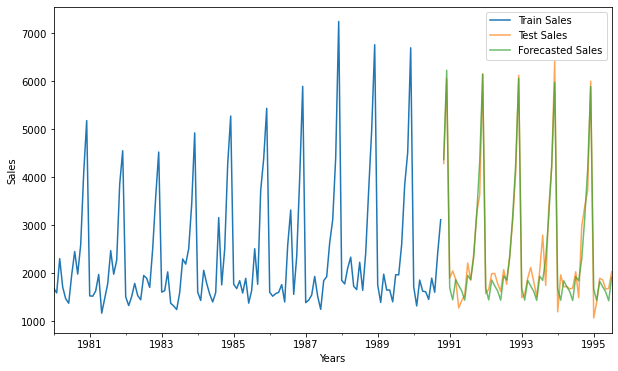

In [432]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['df_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [447]:
resultsDf_14 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Best SARIMA Model : SARIMAX(1, 0, 1)x(1, 0, 1, 12)'])

resultsDf = pd.concat([resultsDf, resultsDf_14])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,1391.708631,NaN
NaiveModel,1496.444629,NaN
SimpleAverageModel,1368.746717,NaN
2pointTrailingMovingAverage,811.178937,NaN
4pointTrailingMovingAverage,1184.213295,NaN
6pointTrailingMovingAverage,1337.200524,NaN
9pointTrailingMovingAverage,1422.653281,NaN
"Alpha=0.048,SES",1362.488305,NaN
"Alpha=1,Beta=0.0189:DES",1472.253660,NaN
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",377.360752,NaN


In [434]:
#Forecast sales using the best fit SARIMA model as per RMSE 

In [435]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [442]:
n_steps = 36
idx = pd.date_range(start='1995-07-31',end='1998-07-01',freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1995-08-01,4369.296464,3224.396683,5920.720516,3224.396683,5920.720516
1995-09-01,6224.968046,4590.506045,8441.384630,4590.506045,8441.384630
1995-10-01,1696.328698,1250.034318,2301.961644,1250.034318,2301.961644
1995-11-01,1447.135966,1065.639675,1965.206957,1065.639675,1965.206957
1995-12-01,1866.423732,1373.414747,2536.406104,1373.414747,2536.406104


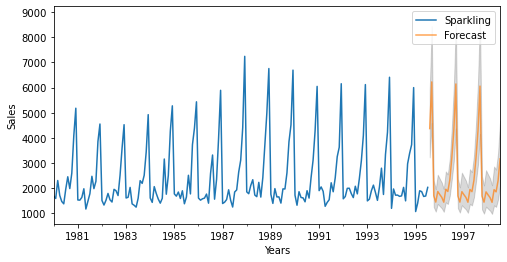

In [443]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [444]:
# Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction

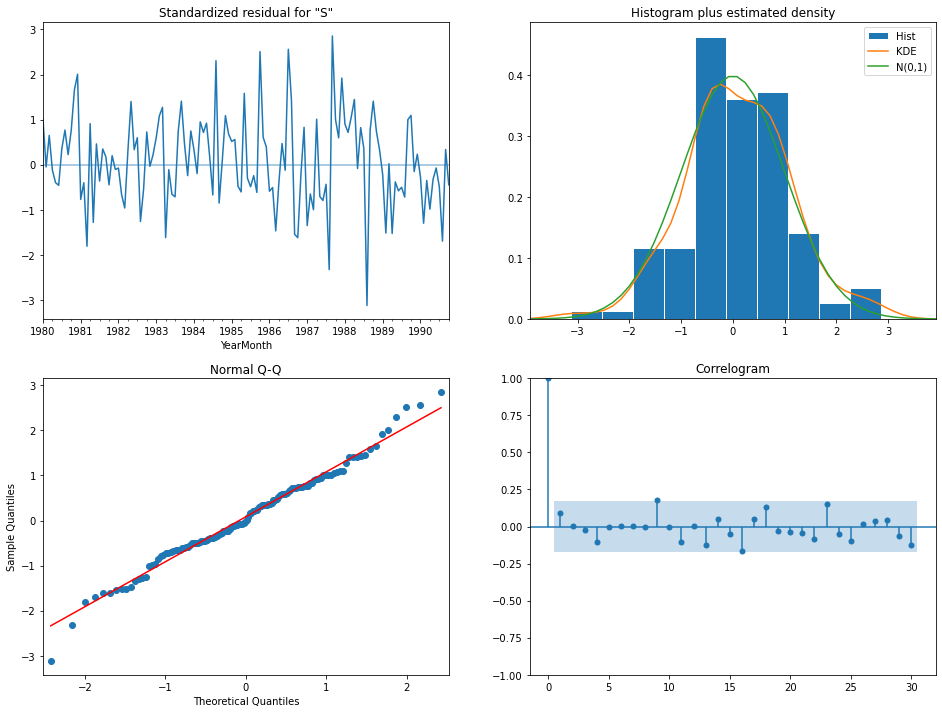

In [445]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [446]:
df.tail()

,Sparkling
YearMonth,
1995-03-31,1897.0
1995-04-30,1862.0
1995-05-31,1670.0
1995-06-30,1688.0
1995-07-31,2031.0
